In [52]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score ,roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import category_encoders as ce

In [53]:
#loading the dataset
df = pd.read_csv("C://Users//User//Downloads//Tillit_Data_Science_Tech_Test.csv")

In [54]:
df.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,NaN,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10+ years,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3 years,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,NaN,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,NaN,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borrower_id                     41029 non-null  int64  
 1   loan_amnt                       41006 non-null  float64
 2   term                            41029 non-null  object 
 3   emp_title                       36311 non-null  object 
 4   emp_length                      36628 non-null  object 
 5   home_ownership                  41029 non-null  object 
 6   annual_inc                      41029 non-null  float64
 7   outcome                         41029 non-null  object 
 8   purpose                         41029 non-null  object 
 9   addr_state                      41029 non-null  object 
 10  dti                             41029 non-null  float64
 11  delinq_2yrs                     41029 non-null  int64  
 12  earliest_cr_line                

The dataset has mixed of numerical and categorical columns

In [56]:
df.isnull().sum()

borrower_id                      0
loan_amnt                       23
term                             0
emp_title                     4718
emp_length                    4401
                              ... 
tax_liens                        0
tot_hi_cred_lim               2404
total_bal_ex_mort             1649
total_bc_limit                1649
total_il_high_credit_limit    2404
Length: 78, dtype: int64

We can see that many features has missing values

In [60]:
df.describe()

,borrower_id,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.102900e+04,41006.000000,4.102900e+04,41029.000000,41029.000000,41029.000000,19875.000000,6816.000000,41029.000000,41029.000000,...,38625.000000,38625.000000,38619.000000,38919.000000,41028.000000,41029.000000,3.862500e+04,3.938000e+04,3.938000e+04,3.862500e+04
mean,1.150215e+06,16410.558211,8.008188e+04,18.929934,0.304565,0.739428,34.447145,70.393192,11.772112,0.212313,...,0.092039,2.371495,94.442378,48.894603,0.133275,0.050452,1.940012e+05,5.288437e+04,2.303843e+04,4.299258e+04
std,6.951414e+05,9760.781054,6.165221e+04,8.563940,0.848155,1.020450,21.962064,26.656694,5.581623,0.604159,...,0.514742,2.124043,8.458709,35.990546,0.378424,0.397772,1.981433e+05,5.167188e+04,2.328772e+04,4.546689e+04
min,1.900000e+01,1000.000000,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.969490e+05,8156.250000,4.700000e+04,12.560000,0.000000,0.000000,16.000000,52.000000,8.000000,0.000000,...,0.000000,1.000000,92.000000,16.700000,0.000000,0.000000,5.325000e+04,2.234350e+04,8.100000e+03,1.394300e+04
50%,1.214344e+06,15000.000000,6.738800e+04,18.860000,0.000000,0.000000,31.000000,71.000000,11.000000,0.000000,...,0.000000,2.000000,100.000000,50.000000,0.000000,0.000000,1.298530e+05,3.988300e+04,1.600000e+04,3.203300e+04
75%,1.816166e+06,24000.000000,9.700000e+04,25.100000,0.000000,1.000000,50.000000,91.000000,15.000000,0.000000,...,0.000000,3.000000,100.000000,80.000000,0.000000,0.000000,2.805980e+05,6.680075e+04,3.010000e+04,5.818800e+04
max,2.260416e+06,40000.000000,3.300000e+06,49.560000,29.000000,8.000000,192.000000,120.000000,59.000000,24.000000,...,29.000000,26.000000,100.000000,100.000000,7.000000,23.000000,4.475891e+06,1.924200e+06,1.105500e+06,1.027358e+06


The employment length feature has both numerical and string values hence, preprocessing the 'emp_length' column by ensuring it contains only numeric values, converting them to a numeric data type, and handling any missing values by imputing them with the mean.

In [62]:
# Extract numeric values from 'emp_length'
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notnull(x) else x)

# Convert 'emp_length_numeric' to numeric type
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

# Impute missing values in 'emp_length_numeric' using the mean
imputer_emp_length = SimpleImputer(strategy='mean')
df['emp_length'] = imputer_emp_length.fit_transform(df[['emp_length']])

# Display the modified DataFrame
df.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,6.0,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10.0,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3.0,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,6.0,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,6.0,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


Replace missing numerical and categorical columns

In [30]:
# Replace numerical missing values with the mean
numerical_cols = ['loan_amnt','emp_length', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
imputer_numeric = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_numeric.fit_transform(df[numerical_cols])

# Replace categorical missing values with the most frequent category
categorical_cols = ['emp_title', 'term']
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

In [63]:
df.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,6.0,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10.0,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3.0,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,6.0,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,6.0,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


CHECKING TOP FEATURES USING RANDOM FOREST CLASSIFIER

Top Numerical Features:
Index(['dti', 'annual_inc', 'loan_amnt', 'revol_util', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'total_bc_limit', 'bc_open_to_buy',
       'avg_cur_bal'],
      dtype='object')


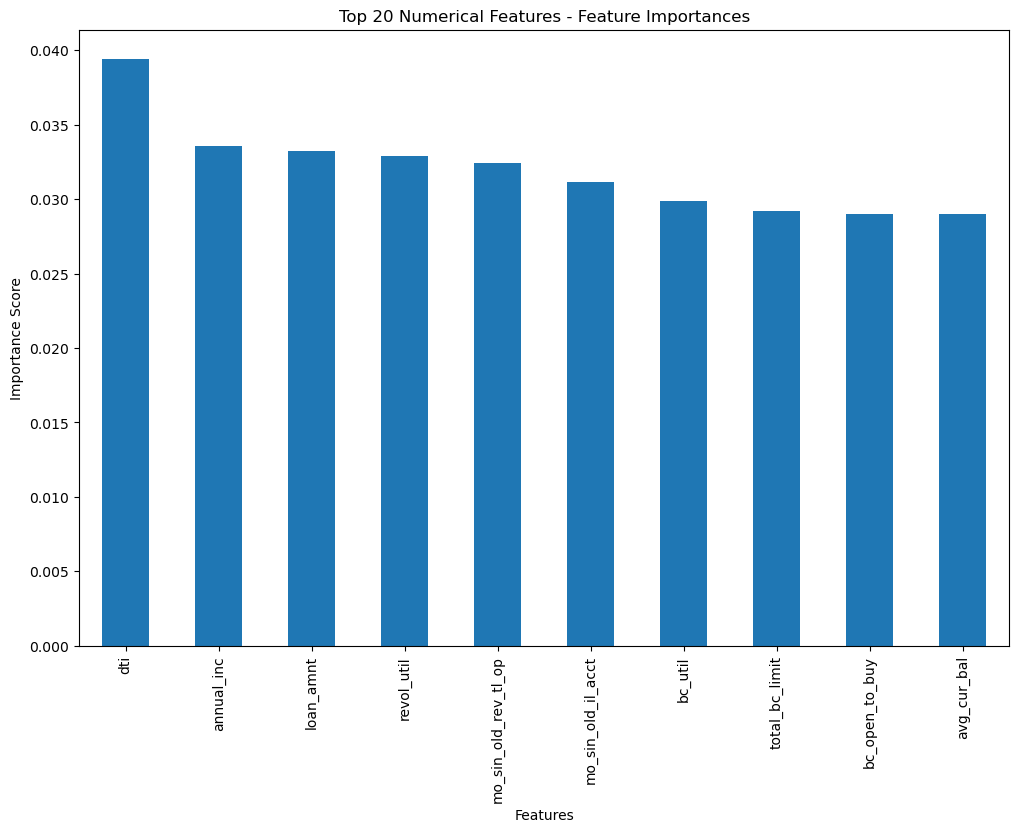

In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Assuming 'outcome' is your target variable
X = df.drop('outcome', axis=1)
y = df['outcome']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Extract important features using RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X[numerical_cols], y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=numerical_cols)

# Print and select top features
top_numerical_features = feature_importances.sort_values(ascending=False).index[:10]
print("Top Numerical Features:")
print(top_numerical_features)

# Extract and handle categorical columns separately if needed
X_categorical = X[categorical_cols]


# Concatenate selected numerical features with categorical columns
X_selected_features = pd.concat([X[top_numerical_features], X_categorical], axis=1)

plt.figure(figsize=(12, 8))
feature_importances[top_numerical_features].sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Numerical Features - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

BINARY ENCODE THE CATEGORICAL COLUMNS

In [78]:
# Assuming 'outcome' is your target variable
X = df.drop('outcome', axis=1)
y = df['outcome']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Binary encode categorical columns
binary_encoder = ce.BinaryEncoder(cols=categorical_cols)
X_binary_encoded = binary_encoder.fit_transform(X[categorical_cols])

# Concatenate binary encoded columns with the original DataFrame
X = pd.concat([X, X_binary_encoded], axis=1)

# Drop the original categorical columns
X = X.drop(categorical_cols, axis=1)

In [79]:
X.shape

(41029, 111)

CORRELATION MATRIX

In [ ]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values (replace with mean or other strategies)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

SCALING THE NUMERICAL FEATURES USING ROBUST SCALING - the numerical columns in 'X' will be scaled using the robust scaling technique. This is particularly useful when dealing with datasets that may contain outliers, as the robust scaling method is less influenced by extreme values.

In [75]:
#scaling the Numerical features
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

PLOT TO CHECK THE CLASS DISTRIBUTION

outcome
Fully Paid    40029
Defaulted      1000
Name: count, dtype: int64


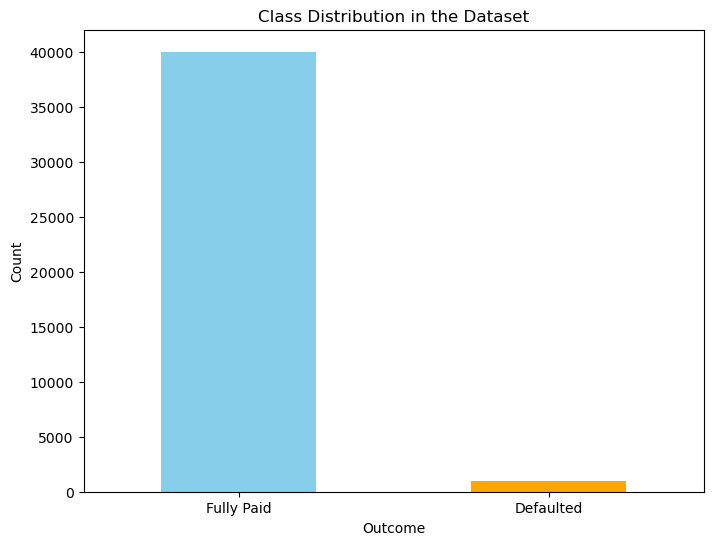

In [76]:
# Count the occurrences of each class
class_counts = df['outcome'].value_counts()
print(class_counts)
# Plotting a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


We can clearly see that there is a class imbalance where the majority of instances belong to the "Fully Paid" category, while a smaller number of instances belong to the "Defaulted" category.

HANDLING IMBALANCE WITH SMOTE

In [77]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

class_distribution = pd.Series(y_resampled).value_counts()

# Plot the bar graph
class_distribution.plot(kind='bar', color=['green', 'blue'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


ValueError: could not convert string to float: '60 months'

After SMOTE, we can see that classes are equally distributed

XGBOOSTING MODEL

In [72]:

# Convert string labels to numerical labels
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Split the undersampled data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Instantiate XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the undersampled data
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
classification_rep_xgb = classification_report(y_test_xgb, y_pred_xgb)

print(f"Accuracy with XGBoost: {accuracy_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(classification_rep_xgb)

Accuracy with XGBoost: 0.9881338995753185
Confusion Matrix:
[[7814  181]
 [   9 8008]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7995
           1       0.98      1.00      0.99      8017

    accuracy                           0.99     16012
   macro avg       0.99      0.99      0.99     16012
weighted avg       0.99      0.99      0.99     16012



CHECKING ROC-AUC SCORE

ROC-AUC Score for XGBoost: 0.9935129563249077


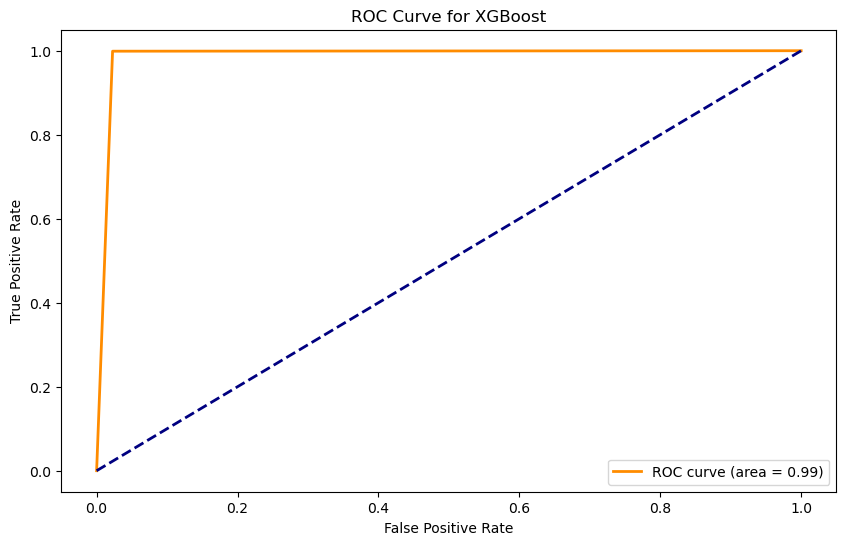

In [73]:
# Encode the labels
y_test_encoded = le.fit_transform(y_test_xgb)
y_pred_encoded = le.transform(y_pred_xgb)

# Calculate ROC-AUC score for XGBoost
roc_auc_xgb = roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test_xgb)[:, 1])
print(f"ROC-AUC Score for XGBoost: {roc_auc_xgb}")

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


CROSS VALIDATION

In [69]:
from sklearn.model_selection import cross_val_score

# Convert string labels to numerical labels
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Instantiate XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled_encoded, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# You can also access other metrics during cross-validation
cv_scores_precision = cross_val_score(xgb_model, X_resampled, y_resampled_encoded, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(xgb_model, X_resampled, y_resampled_encoded, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(xgb_model, X_resampled, y_resampled_encoded, cv=5, scoring='f1')

print("Mean Precision:", cv_scores_precision.mean())
print("Mean Recall:", cv_scores_recall.mean())
print("Mean F1-score:", cv_scores_f1.mean())


Cross-Validation Scores: [0.93742193 0.99868848 0.99843867 0.99581538 0.85210168]
Mean Accuracy: 0.9564932290414317
Mean Precision: 0.9777546932542812
Mean Recall: 0.9379891127875204
Mean F1-score: 0.9520853460760753


RANDOM FOREST CLASSIFIER MODEL

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Split the undersampled data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Print the number of samples in the test data
print("Number of samples in the test data:", X_test_rf.shape[0])

# Instantiate RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the undersampled data
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
classification_rep_rf = classification_report(y_test_rf, y_pred_rf)

print(f"Accuracy with Random Forest: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)



Number of samples in the test data: 16012
Accuracy with Random Forest: 0.9886335248563577
Confusion Matrix:
[[7816  179]
 [   3 8014]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7995
           1       0.98      1.00      0.99      8017

    accuracy                           0.99     16012
   macro avg       0.99      0.99      0.99     16012
weighted avg       0.99      0.99      0.99     16012



ROC-AUC SCORE FOR RANDOM FROEST MODEL

ROC-AUC Score for Random Forest: 0.9972267187386279


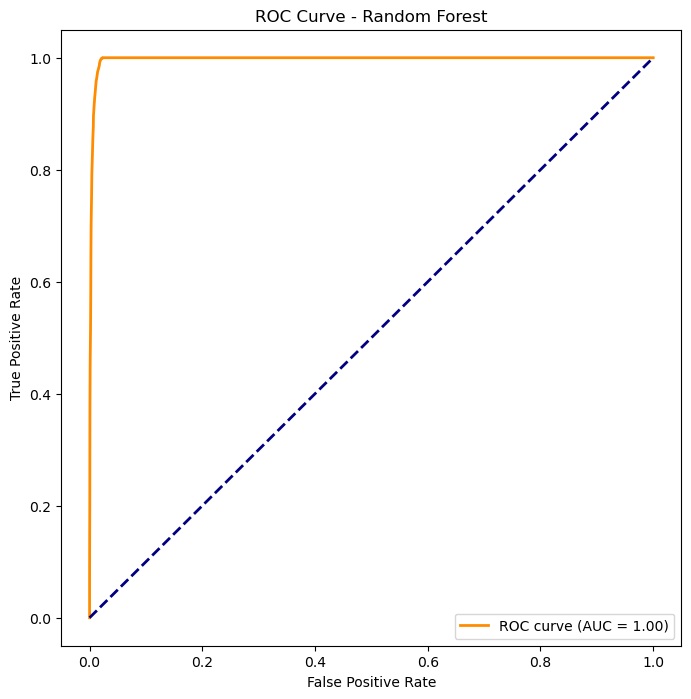

In [74]:
# Calculate ROC-AUC score for Random Forest
roc_auc_rf = roc_auc_score(y_test_rf, rf_model.predict_proba(X_test_rf)[:, 1])
print(f"ROC-AUC Score for Random Forest: {roc_auc_rf}")

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, rf_model.predict_proba(X_test_rf)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


CROSS VALIDATION FOR RANDOM FOREST MODEL

In [67]:
from sklearn.model_selection import cross_val_score

# Instantiate RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cross_val_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled_encoded, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores_rf)
print("Mean Accuracy:", cross_val_scores_rf.mean())

# You can also access other metrics during cross-validation for Random Fores


Cross-Validation Scores: [0.93760929 0.99937547 0.99937547 0.99962526 0.99962526]
Mean Accuracy: 0.987122149019676


In this task, I navigated the challenges of handling imbalanced datasets and implemented advanced techniques like SMOTE to address class imbalance effectively. Rigorous training and evaluation of XGBoost and Random Forest models revealed their commendable performance, showcasing their reliability in predicting loan outcomes. These two models demonstrated robust capabilities, with XGBoost standing out for its superior predictive accuracy and efficient training speed.

Incorporating cross-validation further strengthened the credibility of the models, ensuring their generalizability to unseen data. The comparative analysis between Random Forest and XGBoost sheds light on their respective strengths, with Random Forest excelling in interpretability. Practical recommendations for deployment considerations and potential areas for further research enrich the document, making it a valuable resource for understanding and implementing loan default prediction strategies.
